# Applied Data Science Capstone - The Battle of Neighborhoods

# Plan Model for Decathlon Business Expansion in Singapore

## (Segmenting Singapore)



In [128]:
import codecs
import csv
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import os
import math
import time
import requests
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors



## 1. Build neighborhoods list 
### (Regions of Singapore - Manual extract from Wikipedia Page)

In [129]:
city_data = pd.DataFrame(columns =["neighborhood", "latitude", "longitude"])

with codecs.open("singapore-district-neighborhoods.csv", "r", "utf-8") as districts_file:
    districts_reader = csv.reader(districts_file, delimiter=":")
    for row in districts_reader:
        #print(': '.join(row))
        district = row[0]
        neighborhoods = [x.strip() for x in row[1].split(',')]
        for neigh in neighborhoods: 
            city_data = city_data.append(
                {
                 "neighborhood" : "{},{}".format(district, neigh)
                }, 
                ignore_index=True
            )

### Source file 'singapore-district-neighborhoods.csv' is available in below URL

https://github.com/nishanth-pvn/Coursera_Capstone/blob/master/singapore-district-neighborhoods.csv

In [130]:
print(city_data.shape)
city_data.head(10)

(54, 3)


,neighborhood,latitude,longitude
0,"Central,Bishan",NaN,NaN
1,"Central,Bukit Merah",NaN,NaN
2,"Central,Bukit Timah",NaN,NaN
3,"Central,Downtown Core",NaN,NaN
4,"Central,Geylang",NaN,NaN
5,"Central,Kallang",NaN,NaN
6,"Central,Marina East",NaN,NaN
7,"Central,Marina South",NaN,NaN
8,"Central,Marine Parade",NaN,NaN
9,"Central,Museum",NaN,NaN


## 2. Neighborhoods GeoLocation
### (Using Geocoder Package available in Python)

In [131]:
geolocator = Nominatim()

country = "Singapore"
city = "Singapore"

geocode_filename = "singapore-district-neighborhoods-geocode.csv" 

# if file exists
if os.path.isfile(geocode_filename):
    with codecs.open(geocode_filename, "r", "utf-8") as geocode_file:
        geocode_reader = csv.reader(geocode_file, delimiter=";")
        for row in geocode_reader:
            neighborhood = row[0]
            latitude = row[1]
            longitude = row[2]
            city_data.loc[city_data['neighborhood'] == neighborhood, 'latitude'] = float(latitude)
            city_data.loc[city_data['neighborhood'] == neighborhood, 'longitude'] = float(longitude)
    

with codecs.open(geocode_filename, "a", "utf-8") as geocode_file:
    for index, row in city_data.iterrows():
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        
        if math.isnan(latitude) == True | math.isnan(longitude) == True:
            neighborhood = row['neighborhood']
            address = "{},{},{}".format(neighborhood, city, country)
            retries = 3
            while (retries > 0):
                try:
                    location = geolocator.geocode(address)
                    latitude = location.latitude
                    longitude = location.longitude
                    print("{} : ({},{})".format(address, latitude, longitude))
                    city_data.loc[index, 'latitude'] = float(latitude)
                    city_data.loc[index, 'longitude'] = float(longitude)
                    geocode_file.write("{};{};{}\n".format(neighborhood, latitude, longitude))
                    retries = 0
                except:
                    print("ERROR: ", address)
                    retries = retries - 1
                    time.sleep(1)


### Source File 'singapore-district-neighborhoods-geocode.csv' is available in below URL

https://github.com/nishanth-pvn/Coursera_Capstone/blob/master/singapore-district-neighborhoods-geocode.csv


In [133]:
print(city_data.shape)
city_data

(54, 3)


,neighborhood,latitude,longitude
0,"Central,Bishan",1.35146,103.848
1,"Central,Bukit Merah",1.28063,103.831
2,"Central,Bukit Timah",1.35469,103.776
3,"Central,Downtown Core",1.28712,103.836
4,"Central,Geylang",1.31819,103.887
5,"Central,Kallang",1.31076,103.866
6,"Central,Marina East",1.28862,103.87
7,"Central,Marina South",1.277,103.862
8,"Central,Marine Parade",1.30269,103.907
9,"Central,Museum",1.29655,103.848


In [134]:
city = "Singapore"
location = geolocator.geocode(city)
city_latitude = location.latitude
city_longitude = location.longitude
city_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=11)
for lat, lng, neighborhood in zip(city_data['latitude'], city_data['longitude'], city_data['neighborhood']):
    if math.isnan(lat) == False & math.isnan(lng) == False:
        label_txt = "{}, {}".format(neighborhood, city)
        label = folium.Popup(label_txt, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7).add_to(city_map) 

city_map

### Please refer below URL for Singapore Map (Non-Clustered)

https://github.com/nishanth-pvn/Coursera_Capstone/blob/master/Week5-Singapore_NonClusteredMap.PNG

## 3. Venues compilation (Use FourSquare API)

In [167]:
# Foursquare ID and Secret are masked for security.
CLIENT_ID = 'xxx'
CLIENT_SECRET = 'xxx'
VERSION = '20180605' # Foursquare API version

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: xxx
CLIENT_SECRET:xxx


In [136]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT = 3):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&section=outdoors&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

        except:
            print("ERROR: ", url)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighborhood', 
                  'neighborhood_latitude', 
                  'neighborhood_longitude', 
                  'venue', 
                  'venue_latitude', 
                  'venue_longitude', 
                  'venue_category']
    
    return(nearby_venues)


In [137]:
venues_filename = "singapore-district-neighborhoods-venues.csv"

if os.path.isfile(venues_filename):
    with codecs.open(venues_filename, "r", "utf-8") as venues_file:
        venues_reader = csv.reader(venues_file, delimiter=";")        
        venues_list = []        
        for row in venues_reader:
            venues_list.append([( row[0], row[1], row[2], row[3], row[4], row[5], row[6])])
            
        city_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        city_venues.columns = ['neighborhood', 'neighborhood_latitude', 'neighborhood_longitude', 
                  'venue', 'venue_latitude', 'venue_longitude', 'venue_category']

else:
    city_venues = getNearbyVenues(names=city_data['neighborhood'],
                              latitudes=city_data['latitude'],
                              longitudes=city_data['longitude']
                              )

    with codecs.open(venues_filename, "w", "utf-8") as venues_file:
        for index, row in city_venues.iterrows():
            neighborhood = row['neighborhood']
            neighborhood_latitude = row['neighborhood_latitude']
            neighborhood_longitude = row['neighborhood_longitude']
            venue = row['venue']
            venue_latitude = row['venue_latitude']
            venue_longitude = row['venue_longitude']
            venue_category = row['venue_category']
            venues_file.write("{};{};{};{};{};{};{}\n"
                              .format(neighborhood, neighborhood_latitude, neighborhood_longitude,
                                      venue, venue_latitude, venue_longitude, venue_category))


### Source File 'singapore-district-neighborhoods-venues.csv' is available in below URL

https://github.com/nishanth-pvn/Coursera_Capstone/blob/master/singapore-district-neighborhoods-venues.csv

In [139]:
print("shape {}".format(city_venues.shape))
city_venues.head()

shape (157, 7)


,neighborhood,neighborhood_latitude,neighborhood_longitude,venue,venue_latitude,venue_longitude,venue_category
0,"Central,Bishan",1.3514551,103.8482628,Gymm Boxx XL,1.3499089544875253,103.85068897477275,Gym
1,"Central,Bishan",1.3514551,103.8482628,Bishan Swimming Complex,1.354225078025654,103.85044843987507,Pool
2,"Central,Bishan",1.3514551,103.8482628,Bishan Active Park,1.3548245096703175,103.84768419495201,Park
3,"Central,Bukit Merah",1.2806275,103.8305915,Yoga Movement - The Pod,1.2826514716467718,103.83029451970962,Yoga Studio
4,"Central,Bukit Merah",1.2806275,103.8305915,YOGA INC.,1.2828363,103.8302,Yoga Studio


In [140]:
print('{} uniques categories'.format(len(city_venues['venue_category'].unique())))

37 uniques categories


## 4. Neighborhoods Segmentation 

In [141]:
dummy_df = pd.get_dummies(city_venues[['venue_category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe and move column to the first column
dummy_df['neighborhood'] = city_venues['neighborhood'] 
col_index = dummy_df.columns.tolist().index('neighborhood')
col_order = [dummy_df.columns[col_index]] \
                + list(dummy_df.columns[0:col_index]) \
                + list(dummy_df.columns[col_index+1:])
dummy_df = dummy_df[col_order]
print(dummy_df.shape)
dummy_df.head()

(157, 38)


,neighborhood,Athletics & Sports,Basketball Court,Beach,Bike Trail,Bowling Green,Campground,Canal,Dog Run,Farm,...,Recreation Center,River,Scenic Lookout,Skate Park,Skating Rink,Soccer Field,Sports Club,Trail,Waterfront,Yoga Studio
0,"Central,Bishan",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Central,Bishan",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Central,Bishan",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Central,Bukit Merah",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"Central,Bukit Merah",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [142]:
city_grouped = dummy_df.groupby('neighborhood').mean().reset_index()
print(city_grouped.shape)
city_grouped.head()

(54, 38)


,neighborhood,Athletics & Sports,Basketball Court,Beach,Bike Trail,Bowling Green,Campground,Canal,Dog Run,Farm,...,Recreation Center,River,Scenic Lookout,Skate Park,Skating Rink,Soccer Field,Sports Club,Trail,Waterfront,Yoga Studio
0,"Central,Bishan",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,"Central,Bukit Merah",0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667
2,"Central,Bukit Timah",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,"Central,Downtown Core",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667
4,"Central,Geylang",0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000


In [143]:
Y = city_grouped.drop('neighborhood', 1)
print(Y.shape)
Y.head()

(54, 37)


,Athletics & Sports,Basketball Court,Beach,Bike Trail,Bowling Green,Campground,Canal,Dog Run,Farm,Fishing Spot,...,Recreation Center,River,Scenic Lookout,Skate Park,Skating Rink,Soccer Field,Sports Club,Trail,Waterfront,Yoga Studio
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667
4,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000


- **Before execute K-means we plot the Elbow Curve for determining the best K value**

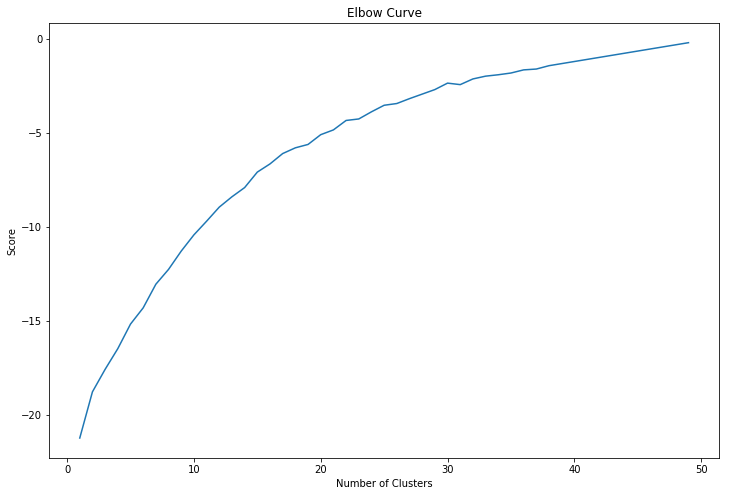

In [144]:
Nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

plt.figure(1, figsize=(12, 8))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [145]:
# set number of clusters
kclusters = 15
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Y)
# check cluster labels generated for each row in the dataframe
print(len(kmeans.labels_))
kmeans.labels_

54


array([ 2,  5, 11,  5,  9,  1,  0,  8,  1,  1, 13,  2,  5,  5,  1,  2,  5,
       10, 12,  2,  8,  1,  2,  1,  4,  2,  6, 13, 11,  3, 14,  1, 10,  1,
        2,  2,  2,  1,  1,  8,  9, 14,  1,  4,  1,  2,  1,  2,  6,  1,  0,
        1,  0,  7], dtype=int32)

In [146]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [147]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
colnames = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        colnames.append('{}{}'.format(ind+1, indicators[ind]))
    except:
        colnames.append('{}th'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=colnames)
neighborhoods_venues_sorted['neighborhood'] = city_grouped['neighborhood']

for ind in np.arange(city_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(54, 4)


,neighborhood,1st,2nd,3rd
0,"Central,Bishan",Pool,Gym,Park
1,"Central,Bukit Merah",Yoga Studio,Athletics & Sports,Trail
2,"Central,Bukit Timah",Mountain,Nature Preserve,Scenic Lookout
3,"Central,Downtown Core",Yoga Studio,Pedestrian Plaza,Fishing Spot
4,"Central,Geylang",Basketball Court,Soccer Field,Yoga Studio
5,"Central,Kallang",Pool,Park,Yoga Studio
6,"Central,Marina East",Golf Course,Park,Yoga Studio
7,"Central,Marina South",Garden,Park,Yoga Studio
8,"Central,Marine Parade",Athletics & Sports,Playground,Waterfront
9,"Central,Museum",Yoga Studio,Park,Plaza


In [148]:
city_merged = city_data
print(city_merged.shape)

# add clustering labels
city_merged['cluster-label'] = kmeans.labels_
# merge city_grouped with city_data to add latitude/longitude for each neighborhood
city_merged = city_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')

print(city_merged.shape)
city_merged

(54, 3)
(54, 7)


,neighborhood,latitude,longitude,cluster-label,1st,2nd,3rd
0,"Central,Bishan",1.35146,103.848,2,Pool,Gym,Park
1,"Central,Bukit Merah",1.28063,103.831,5,Yoga Studio,Athletics & Sports,Trail
2,"Central,Bukit Timah",1.35469,103.776,11,Mountain,Nature Preserve,Scenic Lookout
3,"Central,Downtown Core",1.28712,103.836,5,Yoga Studio,Pedestrian Plaza,Fishing Spot
4,"Central,Geylang",1.31819,103.887,9,Basketball Court,Soccer Field,Yoga Studio
5,"Central,Kallang",1.31076,103.866,1,Pool,Park,Yoga Studio
6,"Central,Marina East",1.28862,103.87,0,Golf Course,Park,Yoga Studio
7,"Central,Marina South",1.277,103.862,8,Garden,Park,Yoga Studio
8,"Central,Marine Parade",1.30269,103.907,1,Athletics & Sports,Playground,Waterfront
9,"Central,Museum",1.29655,103.848,1,Yoga Studio,Park,Plaza


## 5. Segment Cluster analysis

In [149]:
# create map
city = "Singapore"
location = geolocator.geocode(city)
city_latitude = location.latitude
city_longitude = location.longitude
map_clusters = folium.Map(location=[city_latitude, city_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['latitude'], city_merged['longitude'], \
                                  city_merged['neighborhood'], city_merged['cluster-label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Please refer below URL for Singapore Map (Clustered)

https://github.com/nishanth-pvn/Coursera_Capstone/blob/master/Week5-Singapore_ClusteredMap.PNG

In [150]:
def print_cluster_info(cluster_number):
    cluster_data = city_merged.loc[city_merged['cluster-label'] == cluster_number,city_merged.columns[[0]+[1]+[2]+list(range(4,city_merged.shape[1]))]]
    return cluster_data

### Cluster 1
  

In [151]:
print_cluster_info(1)

,neighborhood,latitude,longitude,1st,2nd,3rd
5,"Central,Kallang",1.31076,103.866,Pool,Park,Yoga Studio
8,"Central,Marine Parade",1.30269,103.907,Athletics & Sports,Playground,Waterfront
9,"Central,Museum",1.29655,103.848,Yoga Studio,Park,Plaza
14,"Central,Queenstown",1.29462,103.806,Pool,Skate Park,Park
21,"Central,Toa Payoh",1.33539,103.85,Pool,Playground,Yoga Studio
23,"East,Changi",1.32435,103.933,Pool,Gym / Fitness Center,Plaza
31,"North,Sembawang",1.44806,103.821,Athletics & Sports,Park,Plaza
33,"North,Sungei Kadut",1.415,103.753,Trail,Recreation Center,Playground
37,"North-East,Hougang",1.37336,103.886,Athletics & Sports,Pool,Park
38,"North-East,North-Eastern Islands",1.40078,103.936,Fishing Spot,Beach,Campground


### Cluster 2
  

In [152]:
print_cluster_info(1)

,neighborhood,latitude,longitude,1st,2nd,3rd
5,"Central,Kallang",1.31076,103.866,Pool,Park,Yoga Studio
8,"Central,Marine Parade",1.30269,103.907,Athletics & Sports,Playground,Waterfront
9,"Central,Museum",1.29655,103.848,Yoga Studio,Park,Plaza
14,"Central,Queenstown",1.29462,103.806,Pool,Skate Park,Park
21,"Central,Toa Payoh",1.33539,103.85,Pool,Playground,Yoga Studio
23,"East,Changi",1.32435,103.933,Pool,Gym / Fitness Center,Plaza
31,"North,Sembawang",1.44806,103.821,Athletics & Sports,Park,Plaza
33,"North,Sungei Kadut",1.415,103.753,Trail,Recreation Center,Playground
37,"North-East,Hougang",1.37336,103.886,Athletics & Sports,Pool,Park
38,"North-East,North-Eastern Islands",1.40078,103.936,Fishing Spot,Beach,Campground


### Cluster 3
  

In [153]:
print_cluster_info(2)

,neighborhood,latitude,longitude,1st,2nd,3rd
0,"Central,Bishan",1.35146,103.848,Pool,Gym,Park
11,"Central,Novena",1.32008,103.843,Gym / Fitness Center,Gym,Park
15,"Central,River Valley",1.29728,103.826,Gym,Park,Canal
19,"Central,Straits View",1.28006,103.854,Waterfront,Harbor / Marina,Gym
22,"East,Bedok",1.32567,103.931,Pool,Gym,Plaza
25,"East,Paya Lebar",1.3539,103.888,Gym / Fitness Center,Soccer Field,Bowling Green
34,"North,Woodlands",1.4369,103.786,Park,Gym,Yoga Studio
35,"North,Yishun",1.42814,103.834,Gym,Park,Hot Spring
36,"North-East,Ang Mo Kio",1.36984,103.847,Gym,Park,Dog Run
45,"West,Boon Lay",1.31156,103.7,Harbor / Marina,Scenic Lookout,Farm


### Cluster 4
  

In [154]:
print_cluster_info(3)

,neighborhood,latitude,longitude,1st,2nd,3rd
29,"North,Lim Chu Kang",1.43422,103.715,Farm,Hot Spring,Gym Pool


### Cluster 5
  

In [155]:
print_cluster_info(4)

,neighborhood,latitude,longitude,1st,2nd,3rd
24,"East,Changi Bay",1.31685,104.021,Harbor / Marina,Gym Pool,Hot Spring
43,"West,Bukit Batok",1.34828,103.749,Pool,Basketball Court,Playground


### Cluster 6

In [156]:
print_cluster_info(5)

,neighborhood,latitude,longitude,1st,2nd,3rd
1,"Central,Bukit Merah",1.28063,103.831,Yoga Studio,Athletics & Sports,Trail
3,"Central,Downtown Core",1.28712,103.836,Yoga Studio,Pedestrian Plaza,Fishing Spot
12,"Central,Orchard",1.30527,103.833,Yoga Studio,Gym / Fitness Center,Scenic Lookout
13,"Central,Outram",1.28287,103.838,Yoga Studio,Sports Club,Farm
16,"Central,Rochor",1.30398,103.853,Yoga Studio,Gym / Fitness Center,Playground


### Cluster 7

In [157]:
print_cluster_info(6)

,neighborhood,latitude,longitude,1st,2nd,3rd
26,"East,Pasir Ris",1.37422,103.951,Recreation Center,Gym,Park
48,"West,Clementi",1.31403,103.762,Pool,Gym,Park


### Cluster 8

In [158]:
print_cluster_info(7)

,neighborhood,latitude,longitude,1st,2nd,3rd
53,"West,Western Water Catchment",1.36645,103.681,Gun Range,Yoga Studio,Hot Spring


### Cluster 9

In [159]:
print_cluster_info(8)

,neighborhood,latitude,longitude,1st,2nd,3rd
7,"Central,Marina South",1.277,103.862,Garden,Park,Yoga Studio
20,"Central,Tanglin",1.30604,103.815,Trail,Park,Garden
39,"North-East,Punggol",1.39803,103.907,Basketball Court,Park,Garden


### Cluster 10

In [160]:
print_cluster_info(9)

,neighborhood,latitude,longitude,1st,2nd,3rd
4,"Central,Geylang",1.31819,103.887,Basketball Court,Soccer Field,Yoga Studio
40,"North-East,Seletar",1.36889,103.91,Basketball Court,Dog Run,Yoga Studio


### Cluster 11

In [161]:
print_cluster_info(10)

,neighborhood,latitude,longitude,1st,2nd,3rd
17,"Central,Singapore River",1.28918,103.845,Waterfront,Canal,River
32,"North,Simpang",1.4453,103.85,Outdoors & Recreation,River,Yoga Studio


### Cluster 12

In [162]:
print_cluster_info(11)

,neighborhood,latitude,longitude,1st,2nd,3rd
2,"Central,Bukit Timah",1.35469,103.776,Mountain,Nature Preserve,Scenic Lookout
28,"North,Central Water Catchment",1.37632,103.785,Nature Preserve,Bike Trail,Yoga Studio


### Cluster 13

In [163]:
print_cluster_info(12)

,neighborhood,latitude,longitude,1st,2nd,3rd
18,"Central,Southern Islands",1.27109,103.863,Park,Yoga Studio,Fishing Spot


### Cluster 14

In [164]:
print_cluster_info(13)

,neighborhood,latitude,longitude,1st,2nd,3rd
10,"Central,Newton",1.31296,103.839,Gym,Gym / Fitness Center,Yoga Studio
27,"East,Tampines",1.35465,103.944,Gym,Gym / Fitness Center,Yoga Studio


### Cluster 15

In [165]:
print_cluster_info(14)

,neighborhood,latitude,longitude,1st,2nd,3rd
30,"North,Mandai",1.42353,103.803,Trail,Yoga Studio,Farm
41,"North-East,Sengkang",1.38199,103.903,Trail,Park,Yoga Studio
